## 1 užduotis

Remiantis pavyzdžiu, kuriame analizavome iris datasetą, pasirinkite kitą datasetą iš sklearn.datasets (from sklearn.datasets import load_diabetes). Susipažinkite su jame esančiais duomenimis, nusibraižykite scatter plot, kuriame matysite duomenų išsidėstymą. Atlikę šiuos žingsnius apmokykite modelį naudojant RandomForestClassification ir taip pat DecisionTreesClassification.

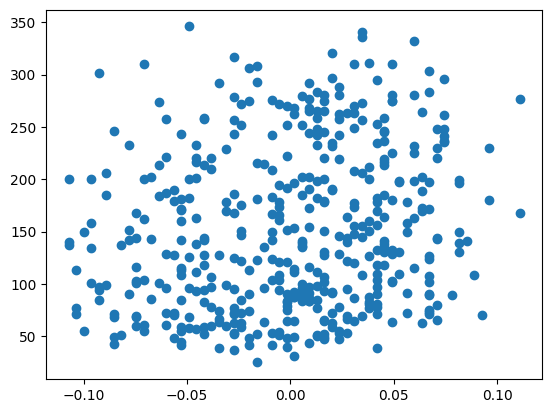

__________ACCURACY_______


TypeError: len() takes exactly one argument (2 given)

In [4]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

diabetes = load_diabetes()
X = diabetes.data
Y = diabetes.target
# print('__________RAKTAI_______')
# print(diabetes.keys())
# print('__________feature_names___________')
# print(diabetes.feature_names)
# print(X[:, 0])
plt.scatter(X[:, 0], Y)
plt.show()

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

model = RandomForestClassifier()
model.fit(X_train, Y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
print('__________ACCURACY_______')
print(len(X_train, Y_train))
print(accuracy)
# svarbumas = model.feature_importances_
# print('__________SVARBUMAS_______')
# print(svarbumas)

# plt.figure(figsize=(10,6))
# plt.xticks(range(len(svarbumas)), diabetes.feature_names)
# plt.bar(range(len(svarbumas)), svarbumas)
# plt.xlabel('Požymiai')
# plt.ylabel('Svarba')
# plt.title('Požymių stiprumas')
# plt.show()

353 89
0.7303370786516854
[0.07638128 0.02487476 0.1754371  0.12200795 0.0809743  0.10531283
 0.08663818 0.06163197 0.19154546 0.07519617]
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


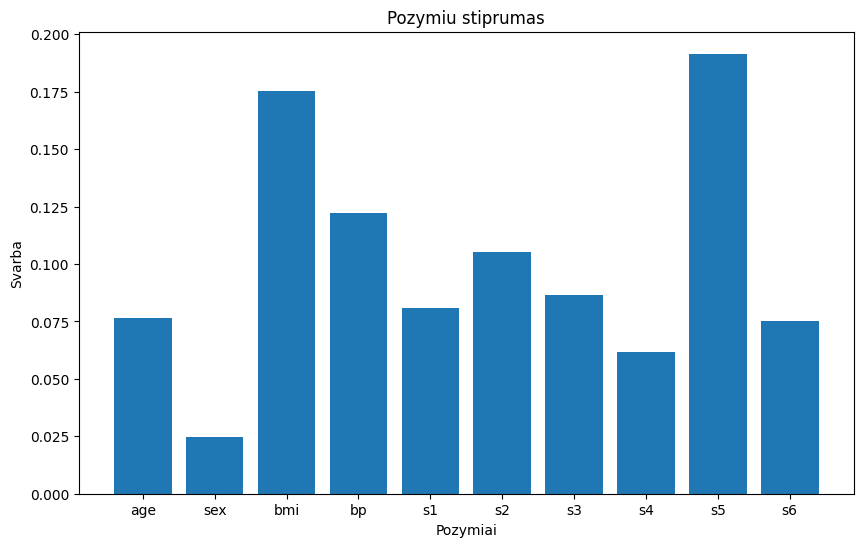

In [7]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
# duomenu pasiruosimas
diabetes = load_diabetes()

X = diabetes.data
y = diabetes.target

Y_diabetes_binary = np.where(y > np.median(y), 1, 0)

# po sio zingsnio jau turime tureti x, y
# print(X)
# print(diabetes.feature_names)
# print(X[:,0])
# plt.scatter(X[:,0], y)
# plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, Y_diabetes_binary, test_size=0.2)

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(len(y_train), len(y_test))
print(accuracy)

svarbumas = model.feature_importances_
print(svarbumas)
print(diabetes.feature_names)

plt.figure(figsize=(10,6))
plt.xticks(range(len(svarbumas)), diabetes.feature_names)
plt.bar(range(len(svarbumas)), svarbumas)
plt.xlabel('Pozymiai')
plt.ylabel('Svarba')
plt.title('Pozymiu stiprumas')
plt.show()

## 2 Užduotis

Parsisiųskite datasetą iš kaggle (arba iš kitų šaltinių). Turėdami jį, atlikite šiuos žingsnius: susipažinkite su jame esančiais duomenimis, nusibraižykite scatter plot, kuriame matysite duomenų išsidėstymą. Atlikę šiuos žingsnius apmokykite modelį naudojant RandomForestClassification ir taip pat DecisionTreesClassification.

In [11]:

from sklearn.tree import DecisionTreeClassifier
import pandas as pd
wine = pd.read_csv("winequalityN.csv" , sep=',')
Y = wine["quality"]
X = wine.drop("quality" , axis = 1)
X = X.drop("type" , axis = 1)
X_mokymui, X_testavimui, Y_mokymui, Y_testavimui = train_test_split(X,Y ,test_size= 0.1 ,random_state=42)
model =DecisionTreeClassifier()
model.fit(X_mokymui , Y_mokymui)

y_pred = model.predict(X_testavimui)
accuracy = accuracy_score(y_pred, Y_testavimui)
print(accuracy)

0.6092307692307692


## 3 Užduotis

Parsisiųskite datasetą iš kaggle (arba iš kitų šaltinių). Turėdami jį, atlikite šiuos žingsnius: susipažinkite su jame esančiais duomenimis, nusibraižykite scatter plot, kuriame matysite duomenų išsidėstymą. Šioje užduotyje duomenis jums reikia klasterizuoti, tad turite patys nustatyti kiek gali būti rūšių arba grupių (clusters), turėdami šią informaciją apmokykite modelį naudojant RandomForestClassification ir taip pat DecisionTreesClassification.


In [53]:
import pandas as pd 
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# duomenų paruošimas, buvo problema, nes buvo NaN
df = pd.read_csv('marketing_campaign.csv', sep='\t')
print(len(df))
df = df[df['Income'].notna()]
print(len(df))
y = df['Response']
# nudropinam stulpelius, kurie yra ne skaičiai
X = df.drop(['Response', 'Education', 'Marital_Status', 'Dt_Customer'], axis=1)
# X = df['Response', 'Year_Birth']
# df.dropna(axis=1)
# df.astype()

# scaler = StandardScaler()
# scaled_data = scaler.fit_transform(X)
# print(scaled_data)

# skaičiuojam vidurkius
kmeans = KMeans(n_clusters=2, random_state=42)
# clusterizavom duomenis
clusters = kmeans.fit_predict(X)
# print(clusters)

X_train, X_test, clusters_train, clusters_test, y_train, y_test = train_test_split(X, clusters, y, test_size=0.2, random_state=42)

# apokom modelį
model = GaussianNB()
model.fit(X_train, clusters_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)
print(accuracy)

cluster_accuracy = accuracy_score(clusters, y)
print(cluster_accuracy)

2240
2216
0.5653153153153153
0.5514440433212996
